# Analyzing the Titanic Data

## Introductionary words

This **project** is part of the **[Udacity data analyst nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002)**. This analysis is done by **[Guillaume Simler](https://github.com/guillaumesimler)** as part of his nanodegree's graduation.

For more infos, please have a look at the related **[githup repo](https://github.com/guillaumesimler/nanodap1)**

## Some discussions about the facts

Everybody knows about the story of the RMS Titanic, the unsinkable sunken cruiser, and her catastrophic ending. If it is not the case, please have a look at the [wikipedia page](https://en.wikipedia.org/wiki/RMS_Titanic).

As it was considered unsinkable, there were no need for life boat capacity matching at least the number of passengers and crews. So this error became quite **fatal**.
Actually you would need far more capacity as the sinking of the [Costa Concordia](https://en.wikipedia.org/wiki/Costa_Concordia_disaster) showed.

One last thing about the Titanic
> *Built by Irishmen. Sunk by Englishmen*

## 1. Loading modules & files 

In [1]:
# Import Modules

%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import Data 

passenger_df = pd.read_csv('titanic-data.csv')

#### Testing the data loading

In [3]:
passenger_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
# Number of data set

print len(passenger_df.index) 

891


## 2. Data wrangling: First Analysis

Several topics need to be checked after the data:
1. Some passengers have no **Cabin** number. Out of the small data set, it seems to be linked with the class: the third class passengers seems to have no numbered cabine. **This needs to be checked !**
2. Some persons don't have any age data filed. **It needs to be checked how frequent this happens !!**


#### 2.1. The "unassigned cabin issue": Data Analysis

In [5]:
# Select the data for the passenger with no cabin

passengers_without_cabins = passenger_df.loc[pd.isnull(passenger_df['Cabin'])]

In [6]:
# Check if there is a link between the absence of cabin and the class

pwoc_nb = passengers_without_cabins.groupby('Pclass')

print 'The number of passengers by class without a cabin number is'
print pwoc_nb.size()


The number of passengers by class without a cabin number is
Pclass
1     40
2    168
3    479
dtype: int64


In [7]:
# Check the number of passenger with cabins

pwc_nb = passenger_df.groupby('Pclass').size() - pwoc_nb.size()

print 'The number of passengers by class with a cabin number is'
print pwc_nb

The number of passengers by class with a cabin number is
Pclass
1    176
2     16
3     12
dtype: int64


In [8]:
# Check the proportion of the passenger with cabins

print pwc_nb / passenger_df.groupby('Pclass').size()

Pclass
1    0.814815
2    0.086957
3    0.024440
dtype: float64


#### Intermediate Results 

You have a completely different view between the classes:
- a large assignment in the first class
- low and decreasing assigment in the two last classes

Consequently we might check the following **hypothesis**: 

the known assigned in the first class are spouces or children staying in the cabin of their related husband/father

In [9]:
# Check if the first class non assigned are Sibling or spouses

pwoc_nb.sum()['SibSp'] + pwoc_nb.sum()['Parch']  

Pclass
1     11
2    132
3    484
dtype: int64

The 11 spouses and children are no matches to the 40 1st class passengers without cabins. 

**We can't draw any conclusions but make some suppositions**:
- the hypothesis is true, but the data set (a sample of 891 passengers out of 1320 passengers and 892 staff menbers) is not "clean" enough. The related data are in the remaining part of the population
- the non assigned shared a cabin but had no filial or marital relationship with the assigned guest. This would include household staff and mistresses
- some cabins were not prebooked and assigned only on the ship and the related records were lost


#### 2.1. The "unassigned cabin issue": Conclusion and consequences

#### The higher proportion of  assigned cabins in the first class

This higher proportion of the known assigned is not that surprising. Although the following comments are assumptions, they might be more than plausible
- the first class passenger more likely booked their cabins centrally and a pre-assignment was made by the company. The latter had more interest to keep a record for this high-value customers for **marketing purposes** (though this term was not coined at the time)
- the other customers would generally be assigned a cabin on the ship itself. If a record was kept - which is not sure -, it lays at the bottom of the Atlantic.

#### Consequences for our inquiries

The unfortunate consequence is that an analysis of survival rates by deck (the first character of the cabin number) is only possible for first class passengers. 
You could also think that a lot of these passengers would be still up enjoying the luxury life on board whereas the second and third class passengers would be more likely asleep.

So **consequently** we will drop an analysis of **survival rates by deck**-

#### 2.2. number of passengers without age data: data analysis

In [10]:
print 'Example of a passanger without age data'

print passenger_df.iloc[5]

Example of a passanger without age data
PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


In [11]:
# Check the data

passengers_wo_age = passenger_df.loc[passenger_df['Age'].isnull()]

print len(passengers_wo_age)

177


#### Intermediate Results

Having **177** passengers (~20%) without age might waterdown the assumptions. Yet the results with the remaining data could be significant enough

In [12]:
passengers_wo_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


#### 2.2. number of passengers without age data: Conclusions

The first view of the data shows that there seems to be **no real correlation between variables**. The results are not dependent from
- the booked class: all are present
- the embarkment place: all are present
- the sex of the passenger: both women and men don't have data
- the assignment of cabins

So **consequently** we would need to accept the **watering down of the age data**.

## 3. Data analysis: what factors made people more likely to survive?

We already saw that **death** was unavoidable in case of a sinking (unless another ship would be near):
- not enough life boats
- waters slightly above the freezing point, i.e. with very fast hypothermia.

But **what would be the factors which made you more likely to be saved?**

### 3.1. Executive Summary

The result of the following analysises were:

#### 3.1.1. Contributing Factors

Higher survival factors are:
- being a woman or child 
- being well-off

#### 3.1.2. Non-Contributing Factors

High survival factors are **not**:
- your boarding port (correlation is not causalation !!)

### 3.2. General aspects

#### 3.2.1. Generic question: What was the overall survival rates?

In [13]:
def display_survivalrate(df):
    df.hist(bins = 3)
    plt.xlabel('Survival (bolean)')
    plt.ylabel('# Passengers')
    plt.title('Fate of the passengers')
    plt.show()
    
    print "Get the some more data: "
    print
    print df.describe()

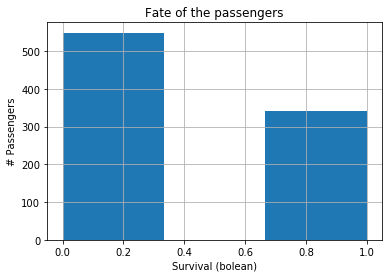

Get the some more data: 

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [14]:
survival = passenger_df['Survived']

display_survivalrate(survival)

#### 3.2.2. Results

These results just confirmed the **certainety of a death toll** with a **survival rate of only 38,38%** (in this case the mean equals the proportion)

### 3.3. Hypothesis n°1: women and children first!

#### 3.3.1. Introduction 

Though it is not legally binding practice, a knightly approach prevails: women and children should take the first boats and men take the remaining (if existing) solution.

#### 3.3.2. Hypothesis:

Based on the principle, we can lay the following hypothesis:

**Being a woman or a child improved drastically your survival chances** (aka survival factor) 

#### 3.2.3. Data Analysis

We need first to get the data for the women and children:
1. Getting women and girls is easy: Select the "female" value for the "Sex" column
2. Getting data for boys is more complicated as we need to decide when a man is a boy and when a man. In this case we will take 15

In [15]:
# Get the women and children data

# Get the women and girls
women_on_board = passenger_df.loc[passenger_df['Sex'] == 'female']

# Get the boys in

## Define a maximum age for boyhood
max_age = 15 

boys_on_board = passenger_df.loc[passenger_df['Sex'] == 'male'].loc[passenger_df['Age'] <= max_age]

men_on_board = passenger_df.loc[passenger_df['Sex'] == 'male'].loc[passenger_df['Age'] > max_age]

women_and_children = women_on_board.merge(boys_on_board, how='outer')

In [16]:
# check data

women_and_children.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
5,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
6,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
7,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
8,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
9,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


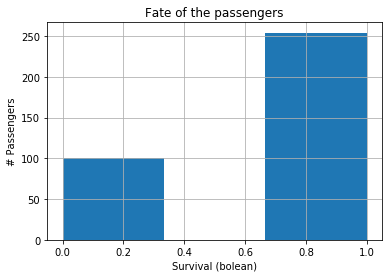

Get the some more data: 

count    354.000000
mean       0.717514
std        0.450846
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [17]:
display_survivalrate(women_and_children['Survived'])

In [18]:
print "As a comparison, the men survival rate (%) was"
print men_on_board['Survived'].mean() * 100

As a comparison, the men survival rate (%) was
17.4334140436


#### 3.3.4. Conclusions

The results are clear.
Women and children were fare more likely to survive (72% survival chance) than men (17% survival chance)

**Consequently <span style="color:green">the "women and children first!" hypothesis is validated</span>**

### 3.4. Hypothesis n°2: let the poor guy die!

#### 3.4.1. Hypothesis:

The obvious assumption would be that the richest passengers would be saved first. 

The first reason would be **practical**:
- 1st class passengers have access to the higher decks where most of the life boats are store 
- moreover, they might have less "competition" for getting in the boats (so less group effect)

The second reason might come from a biased (in our eyes, depictable) **moral** view:
- 1st class passengers could have been seen as "more worthy to be saved"

#### 3.4.2. Data Analysis

For this data, we could use the fare as a proxy for the passenger's wealth. So, let's work on it!

In [19]:
# Describe the fare and age data

passenger_df[['Fare','Age']].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


In [20]:
# Build a helper function

def standardize_column(df, Column):
    
    df[Column] = (df[Column] - df[Column].mean()) / df[Column].std(ddof=0)
    
    return df

In [21]:
# Standardize the fare data

passenger_df = standardize_column(passenger_df,'Fare')

passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,NaN,S


#### 3.4.3. Results

Please be aware that a high class has a low number. Consequently a negative correlation with the class as calculate is actually a positive correlation with your comfort class. 

Let's start with obvious:
- The **strongest correlation** is between fare and class: the higher the class, the higher the fare.
- Your passenger id does not correlate with your survival rate (**lowest correlation**)

Let's continue with the **expected**:
- There is a **stronger, but not too high correlation** between fare and survival and class and survival

Let's face the surprises:
- The age seems to be a small, negative correlation with your survival rates (we could have expected a larger vision)

### 3.5. Hypothesis n°3: rule Britania !

#### 3.5.1. Hypothesis:

One could think that the Titanic being a British vessel passengers who boarded in England could be get a higher priority for safety.


#### 3.5.2. Data Analysis

In [22]:
def survival_rate_emb(df, value):
    return [df.loc[df['Embarked'] == value]['Survived'].mean()]

In [23]:
embarkment_survival = pd.DataFrame(
    data = [survival_rate_emb(passenger_df, 'C'), survival_rate_emb(passenger_df, 'S'), survival_rate_emb(passenger_df, 'Q')],
    index = ['Cherbourg','Southamptom', 'Queenstown' ],
    columns = ['Survival'])

print "Survival rate depending on embarkment port"
embarkment_survival

Survival rate depending on embarkment port


,Survival
Cherbourg,0.553571
Southamptom,0.336957
Queenstown,0.389610


#### 3.5.3. Preliminary Results

Surpringly, passengers embarking from England had the lowest survival rates. Even the passengers from England's first colony (aka Ireland) had a slightly higher survival chance.

How could this be explained?

#### 3.5.4. Further Data analysis

In [24]:
def display_embark(Value):
    embarkment_place = passenger_df.loc[ passenger_df['Embarked'] == Value]

    return embarkment_place.describe()

**Values for Cherbourg**

In [25]:
# Check the values from Cherbourg

display_embark('C')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,168.000000,168.000000,168.000000,130.000000,168.000000,168.000000,168.000000
mean,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,0.558736
std,259.454201,0.498608,0.944100,15.434860,0.557213,0.660481,1.689562
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-0.567631
25%,235.500000,0.000000,1.000000,21.250000,0.000000,0.000000,-0.372618
50%,455.000000,1.000000,1.000000,29.000000,0.000000,0.000000,-0.050421
75%,651.000000,1.000000,3.000000,40.000000,1.000000,1.000000,0.932152
max,890.000000,1.000000,3.000000,71.000000,2.000000,3.000000,9.667167


**Values for Southampton**

In [26]:
# Check the values from Southampton

display_embark('S')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,644.000000,644.000000,644.000000,554.000000,644.000000,644.000000,644.000000
mean,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,-0.103178
std,256.942044,0.473037,0.789402,14.143192,1.216600,0.853253,0.722594
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,-0.648422
25%,225.750000,0.000000,2.000000,21.000000,0.000000,0.000000,-0.486337
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,-0.386671
75%,673.250000,1.000000,3.000000,38.000000,1.000000,0.000000,-0.086664
max,889.000000,1.000000,3.000000,80.000000,8.000000,6.000000,4.647001


**Values for Queenstown**

In [27]:
# Check the values from Queenstown

display_embark('Q')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,77.000000,77.00000,77.000000,28.000000,77.000000,77.000000,77.000000
mean,417.896104,0.38961,2.909091,28.089286,0.428571,0.168831,-0.381113
std,253.646282,0.49086,0.369274,16.915396,0.979105,0.656999,0.285672
min,6.000000,0.00000,1.000000,2.000000,0.000000,0.000000,-0.512513
25%,209.000000,0.00000,3.000000,17.500000,0.000000,0.000000,-0.492378
50%,389.000000,0.00000,3.000000,27.000000,0.000000,0.000000,-0.492378
75%,630.000000,1.00000,3.000000,34.500000,0.000000,0.000000,-0.336334
max,891.000000,1.00000,3.000000,70.500000,4.000000,5.000000,1.163700


#### 3.5.5. Results

So the data shows a good explanation for this tremendous higher survival rate from Cherbourg passengers: they are far more well-off (in average) than the rest of the passengers.

Look at the mean of **classes**: 
- the poor Irish is confirmed (2,9)
- the persons boarding in Cherboug are in far higher classes (1.9) indicating wealthier passengers

And we already demonstrated that those passengers would have higher survival rates. 

There might be a pratical explanation: 
1. as the Titanic was a British vessel, mostly English-leaning passengers would board it.
2. French speaking passengers would rather board French ships in Cherbourg (having mostlikely similar demographics than from Southampton)
3. So, passengers boarding on the Titanic in Cherbourg would be English speakers being in France: so tourists or businessman, so **wealthy persons**

So there is a link with boarding in Cherbourg and surviving, but **correlation is not causalation !!!!**